In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
import numpy as np

In [4]:
titanic = pd.read_csv('C:/Users/Juyeon/Desktop/My folder/data analysis/titanic/train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
sdf = titanic[['Pclass','Age','Fare','Sex','Parch','SibSp','Cabin','Ticket','Embarked','Survived']]
sdf.head()

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22.0,7.2500,male,0,1,NaN,A/5 21171,S,0
1,1,38.0,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26.0,7.9250,female,0,0,NaN,STON/O2. 3101282,S,1
3,1,35.0,53.1000,female,0,1,C123,113803,S,1
4,3,35.0,8.0500,male,0,0,NaN,373450,S,0


In [21]:
sdf.isnull().sum()

Pclass        0
Age         177
Fare          0
Sex           0
Parch         0
SibSp         0
Cabin       687
Ticket        0
Embarked      2
Survived      0
dtype: int64

In [26]:
ar = sdf 
print(sdf['Age'].mean())
age_mean=sdf['Age'].mean()

ar['Age'] = ar['Age'].fillna(age_mean)

#ar['Age'].replace(ar.Age.isna(), sdf['Age'].mean())

29.69911764705882


C:\Users\Juyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
ar.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex           0
Parch         0
SibSp         0
Cabin       687
Ticket        0
Embarked      2
Survived      0
dtype: int64

In [28]:
ar.Age = ar.Age.astype(int)

C:\Users\Juyeon\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Age         891 non-null int32
Fare        891 non-null float64
Sex         891 non-null object
Parch       891 non-null int64
SibSp       891 non-null int64
Cabin       204 non-null object
Ticket      891 non-null object
Embarked    889 non-null object
Survived    891 non-null int64
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.2+ KB


# Multiple Linear Regression 
http://hleecaster.com/ml-multiple-linear-regression-example/
https://jfun.tistory.com/38

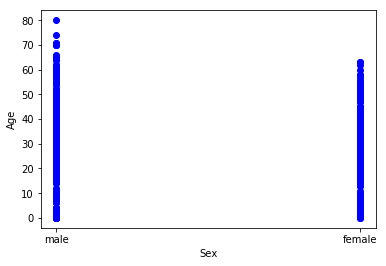

In [47]:
plt.scatter(ar.Sex, ar.Age,  color='blue')
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

In [53]:
#split test / train data 

msk = np.random.rand(len(ar)) < 0.8
train = ar[msk]
test = ar[~msk]

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Age','Pclass','Parch']])
y = np.asanyarray(train[['Survived']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.00777217 -0.22887216  0.04532948]]


In [56]:
y_hat= regr.predict(train[['Age','Pclass','Parch']])
x = np.asanyarray(train[['Age','Pclass','Parch']])
y = np.asanyarray(train[['Survived']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.20
Variance score: 0.15


In [57]:
x = np.asanyarray(test[['Age','Pclass','Parch']])
y = np.asanyarray(test[['Survived']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.00554759 -0.26408125 -0.01009248]]


In [58]:
y_hat= regr.predict(test[['Age','Pclass','Parch']])
x = np.asanyarray(test[['Age','Pclass','Parch']])
y = np.asanyarray(test[['Survived']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.18
Variance score: 0.18


# Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Pclass']])

test_x = np.asanyarray(test[['Age']])
test_y = np.asanyarray(test[['Pclass']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 2.600e+01, 6.760e+02],
       ...,
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.200e+01, 1.024e+03]])

In [65]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00474289 -0.00026815]]
Intercept:  [2.72279678]


Text(0, 0.5, 'Fare')

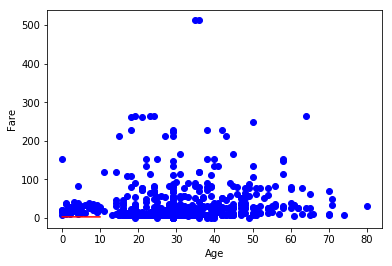

In [71]:
plt.scatter(train.Age, train.Fare,color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Age")
plt.ylabel("Fare")

In [72]:
#Evaluation 

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.67
Residual sum of squares (MSE): 0.58
R2-score: -6.61


# Non-Linear Regression